In [1]:
## for data handling 
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [2]:
tappy_df=pd.read_csv('Imputed_data_Ivan.csv') 

In [3]:
length=len(list(tappy_df.columns))
length
tappy_df.columns

Index(['LLHold', 'LLLatency', 'LRHold', 'LRLatency', 'RLHold', 'RLLatency',
       'RRHold', 'RRLatency', 'LLHoldStd', 'LLLatencyStd', 'LRHoldStd',
       'LRLatencyStd', 'RLHoldStd', 'RLLatencyStd', 'RRHoldStd',
       'RRLatencyStd', 'LLHoldSkew', 'LLLatencySkew', 'LRHoldSkew',
       'LRLatencySkew', 'RLHoldSkew', 'RLLatencySkew', 'RRHoldSkew',
       'RRLatencySkew', 'LLHoldKurt', 'LLLatencyKurt', 'LRHoldKurt',
       'LRLatencyKurt', 'RLHoldKurt', 'RLLatencyKurt', 'RRHoldKurt',
       'RRLatencyKurt', 'LHold', 'LLatency', 'RHold', 'RLatency', 'LHoldStd',
       'LLatencyStd', 'RHoldStd', 'RLatencyStd', 'LHoldSkew', 'LLatencySkew',
       'RHoldSkew', 'RLatencySkew', 'LHoldKurt', 'LLatencyKurt', 'RHoldKurt',
       'RLatencyKurt', 'LRHold_Diff', 'LLRRLatency_Diff', 'LRRLLatency_Diff',
       'Parkinsons'],
      dtype='object')

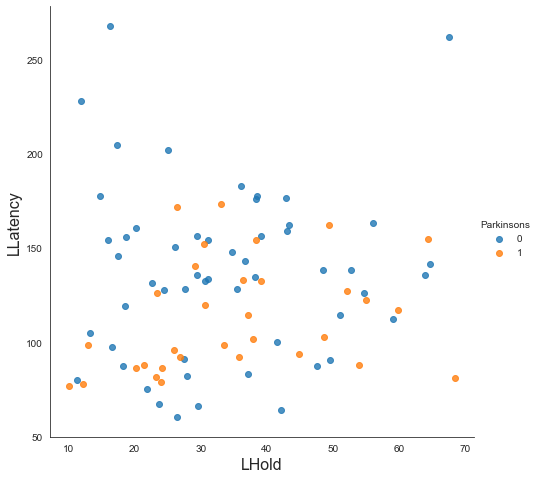

In [4]:
sns.lmplot(data = tappy_df, x = 'RHoldStd', 
            y = 'RLatencyStd',hue='Parkinsons',fit_reg=False,
            height = 6.5,legend=True)

plt.xlabel("LHold",fontsize = 16)
plt.ylabel("LLatency",fontsize = 16)

plt.show()

In [5]:
X = tappy_df.iloc[:,0:length-2].to_numpy()
y = tappy_df.iloc[:,length-1].to_numpy()

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, 
                                                    test_size=0.2,
                                                    random_state = 614, 
                                                    shuffle=True,
                                                    stratify=y)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
def get_acc(model,X,y):
    pred = model.predict(X)
    return np.sum(pred == y)/len(y)

In [11]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors = 6)

knn.fit(X_train,y_train.ravel())

y_test_pred = knn.predict(X_test)

accu=get_acc(knn,X_test,y_test.ravel())

print(accu)
print("Our model has a ",
      np.round(sum(y_test_pred == y_test.ravel())/len(y_test.ravel())*100,2),
      "% accuracy on the test set")
print(precision_score(y_test, y_test_pred))
print(recall_score(y_test, y_test_pred))

confusion_matrix(y_test, y_test_pred)

0.6111111111111112
Our model has a  61.11 % accuracy on the test set
0.5
0.42857142857142855


array([[8, 3],
       [4, 3]], dtype=int64)

In [12]:
from sklearn.model_selection import StratifiedKFold

In [13]:
kfold = StratifiedKFold(5,shuffle = True,random_state = 440)

In [14]:
#CV
max_neighbors = 30

accs = np.zeros((5,max_neighbors))

## keep track of the train test split
j = 0


for train_index, test_index in kfold.split(X_train,y_train):
    # Get the cv train test split
    X_train_train, X_train_test = X_train[train_index], X_train[test_index]
    y_train_train, y_train_test = y_train[train_index], y_train[test_index]
    for i in range(1,max_neighbors+1):
        knn = KNeighborsClassifier(i)
        
        # fit the model
        knn.fit(X_train_train, y_train_train.ravel())
        
        accs[j,i-1] = get_acc(knn, X_train_test, y_train_test.ravel())
        
    j=j+1

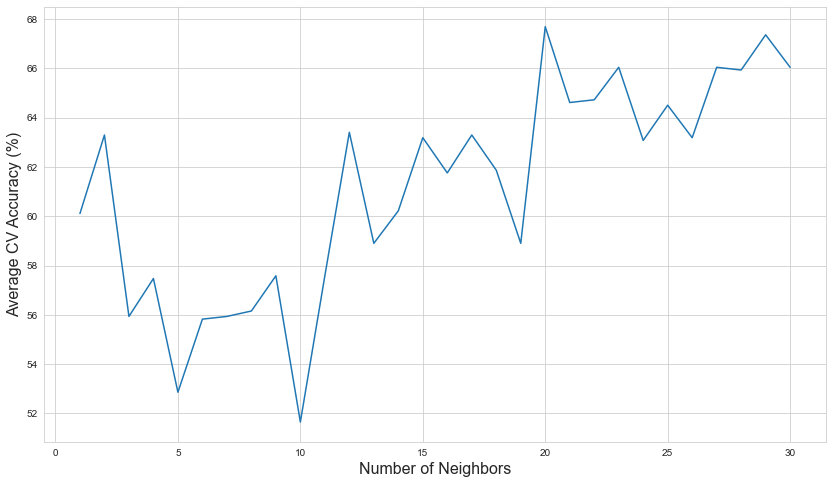

In [15]:
# Plot how the accuracy changes
%matplotlib inline
sns.set_style("whitegrid")

plt.figure(figsize=(14,8))

plt.plot(range(1,max_neighbors+1), 100*np.mean(accs, axis=0))

plt.xlabel("Number of Neighbors", fontsize=16)
plt.ylabel("Average CV Accuracy (%)", fontsize=16)

plt.savefig('AccuracyPerNN.eps', dpi=300, bbox_inches='tight')

plt.show()
